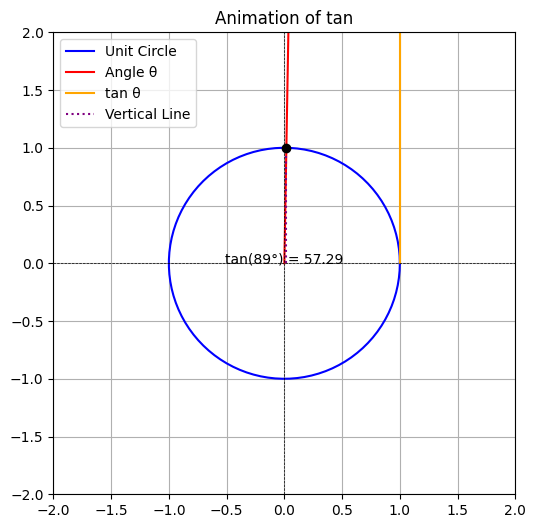

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

# 创建同位圆数据
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

# 创建图形
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, label='Unit Circle', color='blue')

# 角度线和切线
angle_line, = ax.plot([], [], color='red', label='Angle θ')
tan_line, = ax.plot([], [], color='orange', label='tan θ')
vertical_line, = ax.plot([], [], color='purple', linestyle=':', label='Vertical Line')

# 标记点
point, = ax.plot([], [], 'ko')
text = ax.text(0, 0, '', horizontalalignment='center')

# 设置坐标轴
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal', adjustable='box')
ax.axhline(0, color='black', lw=0.5, ls='--')
ax.axvline(0, color='black', lw=0.5, ls='--')
ax.legend()
ax.grid()
ax.set_title('Animation of tan')


# 初始化函数
def init():
    angle_line.set_data([], [])
    tan_line.set_data([], [])
    vertical_line.set_data([], [])
    point.set_data([], [])
    text.set_text('')
    return angle_line, tan_line, vertical_line, point, text


# 更新函数
def update(frame):
    angle = np.radians(frame)  # 转换为弧度

    tan_value = np.tan(angle)  # 计算 tan(π/6)

    # 更新角度线
    angle_line.set_data([0, 1], [0, np.tan(angle)])

    # 更新正切线
    tan_line.set_data([1, 1], [0, tan_value])

    # 更新垂线
    vertical_line.set_data([np.cos(angle), np.cos(angle)], [0, np.sin(angle)])

    # 更新标记点
    point.set_data([np.cos(angle)], [np.sin(angle)])
    text.set_text(f'tan({frame}°) = {np.tan(angle):.2f}')

    return angle_line, tan_line, vertical_line, point, text


# 创建动画
ani = matplotlib.animation.FuncAnimation(fig, update, frames=90, init_func=init, blit=True)
ani.save('tan_animation.gif', fps=10)  # 儲存為 gif